In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

# data preparation

In [2]:
user_data = pd.read_csv("data/customers_dataset.csv")
geo_location_data = pd.read_csv("data/geolocation_dataset.csv")
order_items_data = pd.read_csv("data/order_items_dataset.csv")
order_payments_data = pd.read_csv("data/order_payments_dataset.csv")
order_reviews_data = pd.read_csv("data/order_reviews_dataset.csv")
orders_data = pd.read_csv("data/orders_dataset.csv")
products_category_data = pd.read_csv("data/product_category_name_translation.csv")
products_data = pd.read_csv("data/products_dataset.csv")
sellers_data = pd.read_csv("data/sellers_dataset.csv")

### user distribution

In [3]:
state_names = list(user_data['customer_state'].unique())
customer_unique_ids = list(user_data['customer_unique_id'].unique())
customer_ids = list(user_data['customer_id'].unique())

In [4]:
len(customer_unique_ids), len(customer_ids)

(96096, 99441)

In [5]:
grouped_user_data = user_data.groupby(['customer_state'])

In [6]:
count_user_state_distribution = user_data[['customer_state']].value_counts()

<AxesSubplot:xlabel='customer_state'>

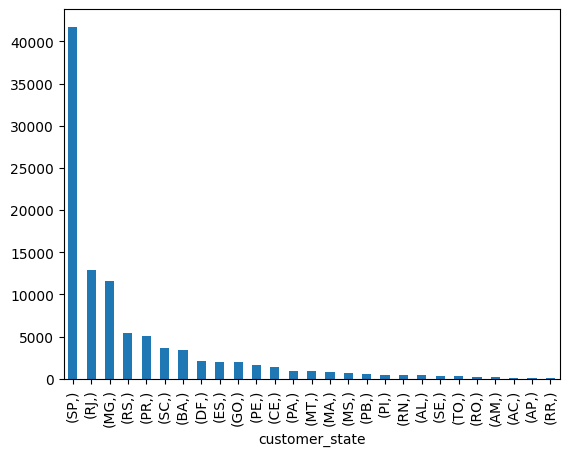

In [7]:
count_user_state_distribution.plot.bar()

In [8]:
user_data[['customer_city']].value_counts()

customer_city 
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Length: 4119, dtype: int64

### Geolocation analytics

In [9]:
geo_location_data

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [10]:
geo_plot_data = pd.DataFrame(geo_location_data[['geolocation_lat', 'geolocation_lng']].value_counts()).reset_index()

In [11]:
BBox = ((geo_plot_data.geolocation_lng.min(),   geo_plot_data.geolocation_lng.max(),      
         geo_plot_data.geolocation_lat.min(), geo_plot_data.geolocation_lat.max()))
BBox

(-101.46676644931476, 121.10539381057764, -36.6053744107061, 45.06593318269697)

In [12]:
ruh_m = plt.imread('map.png')

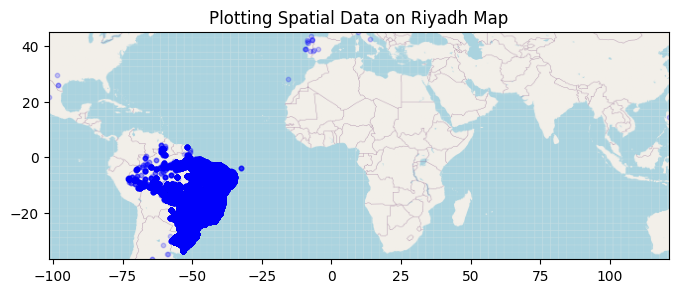

In [13]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(geo_plot_data.geolocation_lng, geo_plot_data.geolocation_lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

### order items data

In [14]:
merged_order_product = pd.merge(order_items_data,products_data, on=["product_id"], how='left')
merged_order_product_catname = pd.merge(merged_order_product,products_category_data, on=["product_category_name"], how='left')
merged_order_product_catname_seller = pd.merge(merged_order_product_catname, sellers_data, on=["seller_id"], how='left')

In [15]:
merged_order_product_catname_seller

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools,87900,loanda,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares,88303,itajai,SC
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories,1206,sao paulo,SP
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure,80610,curitiba,PR
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories,4733,sao paulo,SP


<AxesSubplot:xlabel='product_category_name_english'>

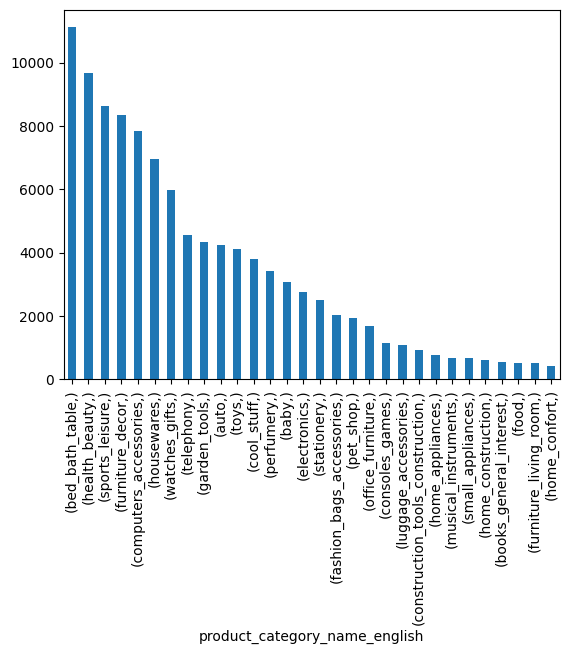

In [16]:
merged_order_product_catname[['product_category_name_english']].value_counts().head(30).plot.bar()

<AxesSubplot:xlabel='seller_state'>

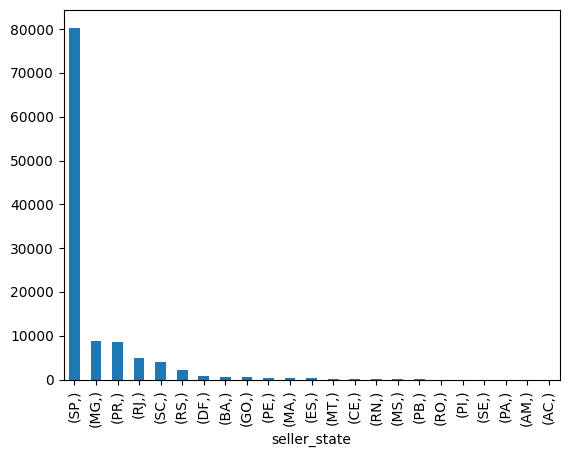

In [17]:
merged_order_product_catname_seller[['seller_state']].value_counts().head(30).plot.bar()

### order data

In [18]:
merged_orders_payment = pd.merge(orders_data, order_payments_data, on=["order_id"], how='left')
merged_orders_payment_review = pd.merge(orders_data, order_reviews_data, on=["order_id"], how='left')

In [19]:
merged_orders_payment_review = merged_orders_payment_review.sort_values(by=['order_purchase_timestamp'])

In [20]:
merged_orders_payment_review['order_date'] = pd.to_datetime(merged_orders_payment_review.loc[:,'order_purchase_timestamp'], format='%Y-%m-%d')
merged_orders_payment_review['order_date'] = merged_orders_payment_review['order_date'].dt.date

In [21]:
count_order_by_date = pd.DataFrame(merged_orders_payment_review[['order_date']].value_counts()).sort_values(by=['order_date'])

<AxesSubplot:xlabel='order_date'>

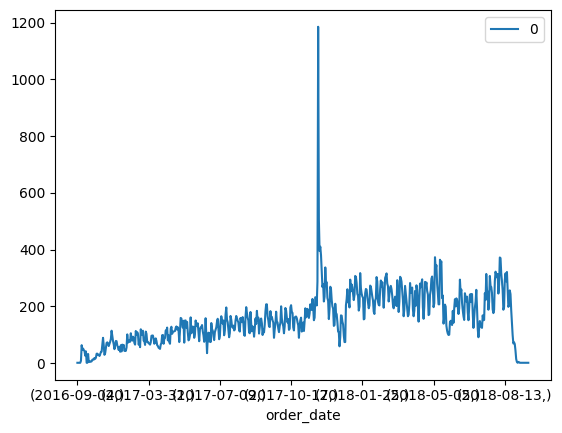

In [22]:
count_order_by_date.plot.line()

In [23]:
count_order_by_date

,0
order_date,
2016-09-04,1
2016-09-05,1
2016-09-13,1
2016-09-15,1
2016-10-02,1
...,...
2018-09-29,1
2018-10-01,1
2018-10-03,1


### Prediction model on future orders

#### advance plot

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [25]:
sns.set()

In [26]:
count_order_by_date = count_order_by_date.reset_index()
count_order_by_date.index = pd.to_datetime(count_order_by_date['order_date'], format='%Y-%m-%d')

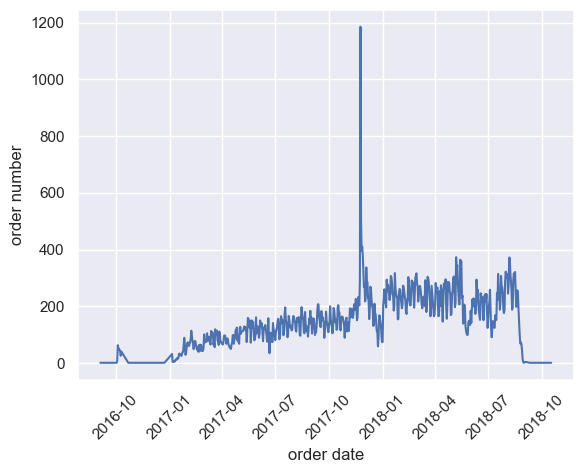

In [28]:
plt.plot(count_order_by_date.index, count_order_by_date[0])# we can see test data with black color

plt.ylabel('order number')
plt.xlabel('order date')
plt.xticks(rotation=45)
plt.show()

##### Spliting data 

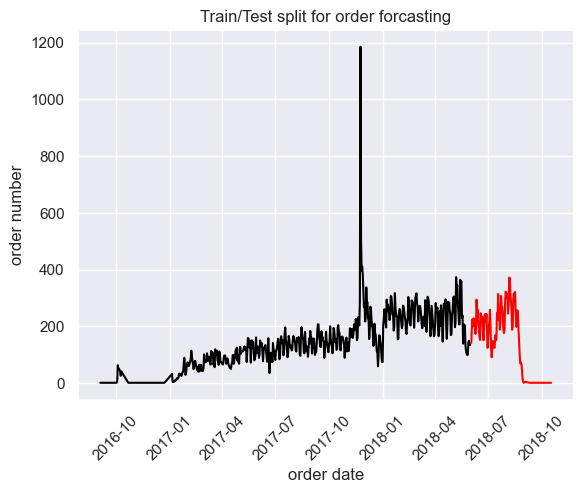

In [29]:
train = count_order_by_date[count_order_by_date.index < pd.to_datetime("2018-06-01", format='%Y-%m-%d')]
test = count_order_by_date[count_order_by_date.index > pd.to_datetime("2018-06-01", format='%Y-%m-%d')] 

plt.plot(train.index, train[0], color = "black")# we can see test data with black color
plt.plot(test.index, test[0], color = "red")# we can see test data with red color

plt.ylabel('order number')
plt.xlabel('order date')
plt.xticks(rotation=45)
plt.title("Train/Test split for order forcasting")
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor

In [33]:
X_train = train.index.values.reshape(-1,1)
Y_train = train[0].values.reshape(-1,1)
X_test = test.index.values.reshape(-1,1)
Y_test = test[0].values.reshape(-1,1)

In [55]:
# !pip install statsmodels

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [77]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51070D+00    |proj g|=  5.92974D-04

At iterate    5    f=  5.51068D+00    |proj g|=  1.65290D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   1.653D-07   5.511D+00
  F =   5.5106825562009671     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


In [88]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = pd.DataFrame(y_pred.conf_int(alpha = 0.5))
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df[1] 

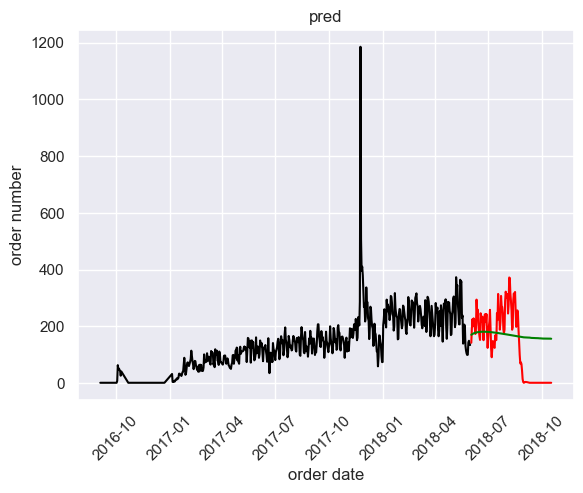

In [89]:
plt.plot(train.index, train[0], color = "black")# we can see test data with black color
plt.plot(test.index, test[0], color = "red")# we can see test data with red color
plt.plot(y_pred_out, color='green', label = 'Predictions')

plt.ylabel('order number')
plt.xlabel('order date')
plt.xticks(rotation=45)
plt.title("pred")
plt.show()

In [92]:
import numpy as np
from sklearn.metrics import mean_squared_error
arma_rmse = np.sqrt(mean_squared_error(y_test, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  169.0135170777287


## predict future

In [98]:
y = count_order_by_date[0].values.reshape(-1,1)

In [99]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

/usr/local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.54592D+00    |proj g|=  3.16886D-01

At iterate    5    f=  6.30636D+00    |proj g|=  7.79483D-03

At iterate   10    f=  6.30086D+00    |proj g|=  6.87278D-03

At iterate   15    f=  6.28639D+00    |proj g|=  1.35673D-02

At iterate   20    f=  6.27379D+00    |proj g|=  1.12066D-02

At iterate   25    f=  6.18938D+00    |proj g|=  5.31806D-02

At iterate   30    f=  6.01565D+00    |proj g|=  1.18865D-01

At iterate   35    f=  5.95666D+00    |proj g|=  3.52187D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f=  5.95533D+00    |proj g|=  2.04452D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     42     96      2     0     0   1.797D-02   5.955D+00
  F =   5.9552290712564897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [104]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = pd.DataFrame(y_pred.conf_int(alpha = 0.5))
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df[1] 

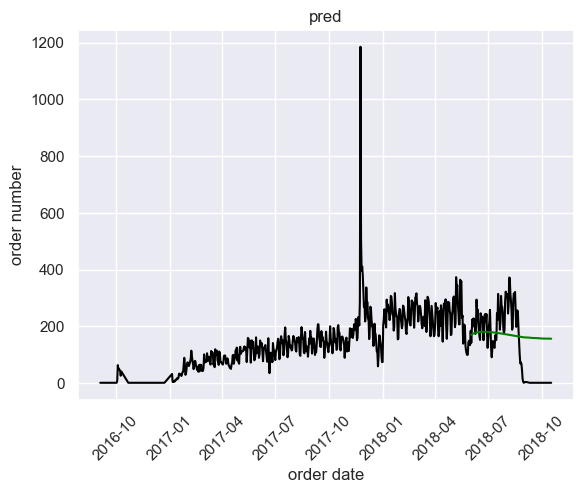

In [105]:
plt.plot(count_order_by_date.index, count_order_by_date[0], color = "black")# we can see test data with black color
plt.plot(y_pred_out, color='green', label = 'Predictions')

plt.ylabel('order number')
plt.xlabel('order date')
plt.xticks(rotation=45)
plt.title("pred")
plt.show()